In [1]:
import warnings
warnings.filterwarnings('ignore', category= Warning)
import pandas as pd
import math
from sklearn.model_selection import train_test_split,KFold
import numpy as np
import os

In [2]:
os.getcwd()

'C:\\Users\\HARITHA\\Downloads'

In [3]:
cf_train=pd.read_csv('counterfeit_train.csv')
cf_test=pd.read_csv('counterfeit_test.csv')

In [4]:
cf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   5652 non-null   float64
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [43]:
cf_train.sample(5)

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data
2306,SST14,14.450,Area049,1997,153.7812,Analgesics,mild,0.069517,DownTown,Tier 1,Medium,967.8872,train
5679,ZWS21,8.850,Area049,1997,163.0340,Cardiac,mild,0.040212,DownTown,Tier 1,Medium,2869.4120,train
2016,NXQ22,18.400,Area049,1997,121.9886,Antibiotics,mild,0.141614,DownTown,Tier 1,Medium,1669.6404,train
3311,QBS73,13.450,Area046,1995,265.2040,MuscleRelaxants,mild,0.013000,DownTown,Tier 1,Small,4161.0640,train
3092,XHP14,11.495,Area035,2002,54.9428,Hreplacements,mild,0.054934,DownTown,Tier 2,Small,728.1992,train


In [5]:
cf_train.var()

Counterfeit_Weight     2.161941e+01
Active_Since           7.003980e+01
Medicine_MRP           3.869333e+03
Availability_rating    2.650331e-03
Counterfeit_Sales      2.867449e+06
dtype: float64

In [6]:
cf_train.corr()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
Counterfeit_Weight,1.000000,-0.016590,0.028523,-0.017632,0.005959
Active_Since,-0.016590,1.000000,0.002996,-0.075744,-0.039595
Medicine_MRP,0.028523,0.002996,1.000000,-0.003216,0.573684
Availability_rating,-0.017632,-0.075744,-0.003216,1.000000,-0.124058
Counterfeit_Sales,0.005959,-0.039595,0.573684,-0.124058,1.000000


In [7]:
cf_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          1705 non-null   object 
 1   Counterfeit_Weight   1408 non-null   float64
 2   DistArea_ID          1705 non-null   object 
 3   Active_Since         1705 non-null   int64  
 4   Medicine_MRP         1705 non-null   float64
 5   Medicine_Type        1705 non-null   object 
 6   SidEffect_Level      1705 non-null   object 
 7   Availability_rating  1705 non-null   float64
 8   Area_Type            1705 non-null   object 
 9   Area_City_Type       1705 non-null   object 
 10  Area_dist_level      1705 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 146.6+ KB


In [8]:
cf_test['Counterfeit_Sales']=np.nan 

In [9]:
cf_train.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [10]:
cf_test.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium,NaN
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown,NaN
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown,NaN
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown,NaN
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small,NaN


In [11]:
cf_train.isnull().sum()

Medicine_ID               0
Counterfeit_Weight     1166
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales         0
dtype: int64

In [12]:
cf_test.isnull().sum()

Medicine_ID               0
Counterfeit_Weight      297
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales      1705
dtype: int64

In [13]:
cf_train['data']='train'
cf_test['data']='test'

# Combining Train and test files

In [14]:
cf_all=pd.concat([cf_train,cf_test],axis=0)

In [15]:
cf_all

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026,train
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520,train
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920,train
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130,train
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,KXW10,NaN,Area027,1983,136.5704,Hreplacements,mild,0.050505,CityLimits,Tier 3,Medium,NaN,test
1701,CKE54,21.300,Area035,2002,57.0744,Antibiotics,critical,0.041118,DownTown,Tier 2,Small,NaN,test
1702,HAY13,20.400,Area017,2005,182.7422,Antiseptics,mild,0.191273,DownTown,Tier 2,Unknown,NaN,test
1703,ZEE32,20.000,Area018,2007,266.9672,Hreplacements,mild,0.013000,Industrial,Tier 3,Medium,NaN,test


In [16]:
cf_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 1704
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          8523 non-null   object 
 1   Counterfeit_Weight   7060 non-null   float64
 2   DistArea_ID          8523 non-null   object 
 3   Active_Since         8523 non-null   int64  
 4   Medicine_MRP         8523 non-null   float64
 5   Medicine_Type        8523 non-null   object 
 6   SidEffect_Level      8523 non-null   object 
 7   Availability_rating  8523 non-null   float64
 8   Area_Type            8523 non-null   object 
 9   Area_City_Type       8523 non-null   object 
 10  Area_dist_level      8523 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
 12  data                 8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 932.2+ KB


In [17]:
cf_all['data'].value_counts()

train    6818
test     1705
Name: data, dtype: int64

In [18]:
cf_all.isnull().sum()

Medicine_ID               0
Counterfeit_Weight     1463
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales      1705
data                      0
dtype: int64

In [ ]:
# Creating one hot encoding and dummy variable

In [19]:
#extracting object columns
category_columns=cf_all.select_dtypes('object').columns

In [21]:
category_columns=category_columns.drop('data')

In [22]:
category_columns

Index(['Medicine_ID', 'DistArea_ID', 'Medicine_Type', 'SidEffect_Level',
       'Area_Type', 'Area_City_Type', 'Area_dist_level'],
      dtype='object')

In [23]:
cf_all['DistArea_ID'].value_counts()

Area027    935
Area013    932
Area035    930
Area049    930
Area046    930
Area045    929
Area018    928
Area017    926
Area010    555
Area019    528
Name: DistArea_ID, dtype: int64

In [24]:
cf_all['Medicine_Type'].value_counts()

Antibiotics           1232
Hreplacements         1200
Antiseptics            910
OralContraceptives     856
Antipyretics           682
Cardiac                649
Mstablizers            648
Tranquilizers          520
Analgesics             445
Antimalarial           425
Antacids               251
Statins                214
MuscleRelaxants        169
Antifungal             148
Stimulants             110
Antiviral               64
Name: Medicine_Type, dtype: int64

In [25]:
for cat in cf_all.select_dtypes('object').columns:
    print(cat,':',cf_all[cat].value_counts())

Medicine_ID : SGZ11    12
KIS14    10
ORS21    10
GVZ23    10
QLK14     9
         ..
QGU83     1
YDD11     1
BIY14     1
ETU15     1
JPY13     1
Name: Medicine_ID, Length: 1557, dtype: int64
DistArea_ID : Area027    935
Area013    932
Area035    930
Area049    930
Area046    930
Area045    929
Area018    928
Area017    926
Area010    555
Area019    528
Name: DistArea_ID, dtype: int64
Medicine_Type : Antibiotics           1232
Hreplacements         1200
Antiseptics            910
OralContraceptives     856
Antipyretics           682
Cardiac                649
Mstablizers            648
Tranquilizers          520
Analgesics             445
Antimalarial           425
Antacids               251
Statins                214
MuscleRelaxants        169
Antifungal             148
Stimulants             110
Antiviral               64
Name: Medicine_Type, dtype: int64
SidEffect_Level : mild        5517
critical    3006
Name: SidEffect_Level, dtype: int64
Area_Type : DownTown              5577
Mid

In [26]:
for cat in cf_all.select_dtypes('object').columns:
    print(cat,':',cf_all[cat].nunique())

Medicine_ID : 1557
DistArea_ID : 10
Medicine_Type : 16
SidEffect_Level : 2
Area_Type : 4
Area_City_Type : 3
Area_dist_level : 4
data : 2


In [27]:
k=cf_all['Medicine_Type'].value_counts()
for val in k.axes[0][:10]:
    varname='Medicine_Type_'+val.replace(',','_').replace(' ','_')
    cf_all[varname]=np.where(cf_all['Medicine_Type']==val,1,0)
    
del cf_all['Medicine_Type']    

In [28]:
import matplotlib.pyplot as plt

In [29]:
pwd

'C:\\Users\\HARITHA\\Downloads'

In [30]:
for cat in ['DistArea_ID', 'SidEffect_Level','Area_Type', 'Area_City_Type', 'Area_dist_level']:
    temp=pd.get_dummies(cf_all[cat],prefix=cat,drop_first=True)
    cf_all=pd.concat([temp,cf_all],1)
    cf_all.drop([cat],1,inplace=True)

In [31]:
cf_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 1704
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Area_dist_level_Medium            8523 non-null   uint8  
 1   Area_dist_level_Small             8523 non-null   uint8  
 2   Area_dist_level_Unknown           8523 non-null   uint8  
 3   Area_City_Type_Tier 2             8523 non-null   uint8  
 4   Area_City_Type_Tier 3             8523 non-null   uint8  
 5   Area_Type_DownTown                8523 non-null   uint8  
 6   Area_Type_Industrial              8523 non-null   uint8  
 7   Area_Type_MidTownResidential      8523 non-null   uint8  
 8   SidEffect_Level_mild              8523 non-null   uint8  
 9   DistArea_ID_Area013               8523 non-null   uint8  
 10  DistArea_ID_Area017               8523 non-null   uint8  
 11  DistArea_ID_Area018               8523 non-null   uint8  
 12  DistAr

In [32]:
cf_all.isnull().sum()

Area_dist_level_Medium                 0
Area_dist_level_Small                  0
Area_dist_level_Unknown                0
Area_City_Type_Tier 2                  0
Area_City_Type_Tier 3                  0
Area_Type_DownTown                     0
Area_Type_Industrial                   0
Area_Type_MidTownResidential           0
SidEffect_Level_mild                   0
DistArea_ID_Area013                    0
DistArea_ID_Area017                    0
DistArea_ID_Area018                    0
DistArea_ID_Area019                    0
DistArea_ID_Area027                    0
DistArea_ID_Area035                    0
DistArea_ID_Area045                    0
DistArea_ID_Area046                    0
DistArea_ID_Area049                    0
Medicine_ID                            0
Counterfeit_Weight                  1463
Active_Since                           0
Medicine_MRP                           0
Availability_rating                    0
Counterfeit_Sales                   1705
data            

In [33]:
cf_all['Counterfeit_Weight'].isnull().sum()

1463

#Imputing missing values

In [34]:
# cf_all['Counterfeit_Weight'].fillna(cf_all['Counterfeit_Weight'].mean(),inplace=True) OR
cf_all.loc[cf_all['Counterfeit_Weight'].isnull(),'Counterfeit_Weight']=np.mean(cf_all['Counterfeit_Weight'])

In [35]:
cf_all.isnull().sum()

Area_dist_level_Medium                 0
Area_dist_level_Small                  0
Area_dist_level_Unknown                0
Area_City_Type_Tier 2                  0
Area_City_Type_Tier 3                  0
Area_Type_DownTown                     0
Area_Type_Industrial                   0
Area_Type_MidTownResidential           0
SidEffect_Level_mild                   0
DistArea_ID_Area013                    0
DistArea_ID_Area017                    0
DistArea_ID_Area018                    0
DistArea_ID_Area019                    0
DistArea_ID_Area027                    0
DistArea_ID_Area035                    0
DistArea_ID_Area045                    0
DistArea_ID_Area046                    0
DistArea_ID_Area049                    0
Medicine_ID                            0
Counterfeit_Weight                     0
Active_Since                           0
Medicine_MRP                           0
Availability_rating                    0
Counterfeit_Sales                   1705
data            

In [36]:
cf_all.shape

(8523, 35)

In [37]:
cf_all.var()

Area_dist_level_Medium              2.203391e-01
Area_dist_level_Small               2.017042e-01
Area_dist_level_Unknown             2.028324e-01
Area_City_Type_Tier 2               2.200147e-01
Area_City_Type_Tier 3               2.385906e-01
Area_Type_DownTown                  2.262035e-01
Area_Type_Industrial                9.703798e-02
Area_Type_MidTownResidential        1.109347e-01
SidEffect_Level_mild                2.283274e-01
DistArea_ID_Area013                 9.740492e-02
DistArea_ID_Area017                 9.685434e-02
DistArea_ID_Area018                 9.703798e-02
DistArea_ID_Area019                 5.811903e-02
DistArea_ID_Area027                 9.767983e-02
DistArea_ID_Area035                 9.722150e-02
DistArea_ID_Area045                 9.712975e-02
DistArea_ID_Area046                 9.722150e-02
DistArea_ID_Area049                 9.722150e-02
Counterfeit_Weight                  1.786012e+01
Active_Since                        7.008637e+01
Medicine_MRP        

In [38]:
cf_all.drop(['Availability_rating'],1,inplace=True)

In [39]:
cf_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 1704
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Area_dist_level_Medium            8523 non-null   uint8  
 1   Area_dist_level_Small             8523 non-null   uint8  
 2   Area_dist_level_Unknown           8523 non-null   uint8  
 3   Area_City_Type_Tier 2             8523 non-null   uint8  
 4   Area_City_Type_Tier 3             8523 non-null   uint8  
 5   Area_Type_DownTown                8523 non-null   uint8  
 6   Area_Type_Industrial              8523 non-null   uint8  
 7   Area_Type_MidTownResidential      8523 non-null   uint8  
 8   SidEffect_Level_mild              8523 non-null   uint8  
 9   DistArea_ID_Area013               8523 non-null   uint8  
 10  DistArea_ID_Area017               8523 non-null   uint8  
 11  DistArea_ID_Area018               8523 non-null   uint8  
 12  DistAr

In [45]:
import seaborn as sns
%matplotlib inline

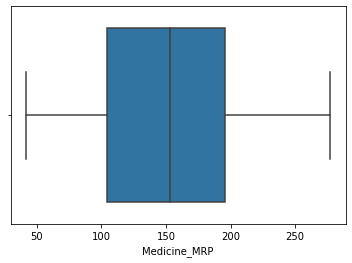

In [46]:
sns.boxplot(cf_all['Medicine_MRP'])

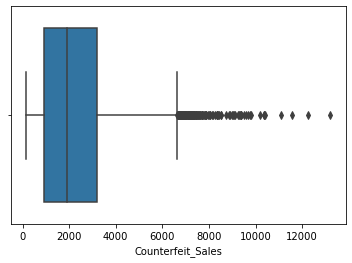

In [101]:
#Checking outliers 
sns.boxplot(cf_all['Counterfeit_Sales'])

# Separating train and test data

In [40]:
train_clean=cf_all[cf_all['data']=='train']
del train_clean['data']
test_clean=cf_all[cf_all['data']=='test']
test_clean.drop(['data','Counterfeit_Sales'],1,inplace=True)

In [103]:
train_clean.shape,test_clean.shape

((6818, 33), (1705, 32))

In [42]:
train_clean.info(),test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 0 to 6817
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Area_dist_level_Medium            6818 non-null   uint8  
 1   Area_dist_level_Small             6818 non-null   uint8  
 2   Area_dist_level_Unknown           6818 non-null   uint8  
 3   Area_City_Type_Tier 2             6818 non-null   uint8  
 4   Area_City_Type_Tier 3             6818 non-null   uint8  
 5   Area_Type_DownTown                6818 non-null   uint8  
 6   Area_Type_Industrial              6818 non-null   uint8  
 7   Area_Type_MidTownResidential      6818 non-null   uint8  
 8   SidEffect_Level_mild              6818 non-null   uint8  
 9   DistArea_ID_Area013               6818 non-null   uint8  
 10  DistArea_ID_Area017               6818 non-null   uint8  
 11  DistArea_ID_Area018               6818 non-null   uint8  
 12  DistAr

(None, None)

In [49]:
x=train_clean.drop(['Counterfeit_Sales','Medicine_ID'],1)
y=train_clean['Counterfeit_Sales']
x.shape,y.shape

((6818, 31), (6818,))

In [51]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=123)

In [52]:
from sklearn.linear_model import LinearRegression

In [54]:
lr=LinearRegression(fit_intercept=True)

In [55]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [56]:
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
pred=lr.predict(x_val)

In [58]:
pred.shape,y_val.shape

((1364,), (1364,))

In [61]:
error=y_val-pred
error

2889    1190.450076
2542      48.675391
4565     784.399776
5942   -1164.368413
5938    1245.213941
           ...     
2769     158.886476
1818     191.451855
409     -443.696293
6738    2097.143828
5784       1.760310
Name: Counterfeit_Sales, Length: 1364, dtype: float64

In [63]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_val,pred)

In [64]:
MAE

845.6387274085955

In [65]:
score=1-(MAE/1660)

In [66]:
score #Linear Regression 

0.49057907987434

# Decision Tree

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
params={
    'criterion':['mse',None],
    'max_depth':[None,5,10,15,20,30,40,50,70],
    'min_samples_leaf':[1,2,5,10,15,20],
    'min_samples_split':[2,5,10,15,20,25]
}

In [76]:
2*9*6*6*10 #No. of iteration 

6480

In [77]:
clf=DecisionTreeRegressor()

In [78]:
random_search=RandomizedSearchCV(clf,param_distributions=params,cv=10,n_jobs=-1,n_iter=100,verbose=20)

In [79]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 580 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 588 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 596 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 604 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 620 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 628 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 652 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 660 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 684 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 692 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 700 tasks      | elapsed:   12.8s
[Paralle

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', None],
                                        'max_depth': [None, 5, 10, 15, 20, 30,
                                                      40, 50, 70],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              25]},
                   verbose=20)

In [80]:
clf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [81]:
def report(results, n_top=3):
    for i in range(1,n_top+1):
        candidates = np.flatnonzero(results['rank_test_score']== i)
        
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean Validation Score: {0:.8f} (std:{1:.3f})'.format(
                    results['mean_test_score'][candidate],
                    results['std_test_score'][candidate]))
            print("Parameters:{0}".format(results['params'][candidate]))
            print("")

In [82]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean Validation Score: 0.59424350 (std:0.026)
Parameters:{'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 5, 'criterion': 'mse'}

Model with rank: 2
Mean Validation Score: 0.59423644 (std:0.026)
Parameters:{'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': 5, 'criterion': 'mse'}

Model with rank: 3
Mean Validation Score: 0.59307934 (std:0.026)
Parameters:{'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'mse'}

Model with rank: 4
Mean Validation Score: 0.59305987 (std:0.026)
Parameters:{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'mse'}

Model with rank: 5
Mean Validation Score: 0.57033042 (std:0.022)
Parameters:{'min_samples_split': 20, 'min_samples_leaf': 20, 'max_depth': 10, 'criterion': 'mse'}



In [83]:
random_search.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [85]:
dt=random_search.best_estimator_

In [86]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [87]:
pred=dt.predict(x_val)

In [88]:
pred.shape,y_val.shape

((1364,), (1364,))

In [89]:
MAE=mean_absolute_error(y_val,pred)
MAE

765.423510038305

In [90]:
score=1-(MAE/1660)
score # DecisionTree with Randomsearch

0.5389014999769246

In [91]:
test_clean.shape,x_train.shape

((1705, 32), (5454, 31))

In [92]:
x_test=test_clean.drop(['Medicine_ID'],1)

In [94]:
x_test.shape,x_val.shape

((1705, 31), (1364, 31))

In [95]:
final_pred=dt.predict(x_test)

In [96]:
final_pred.shape

(1705,)

In [97]:
Submission=pd.DataFrame(list(zip(test_clean['Medicine_ID'],list(final_pred))),columns=['Medicine_ID','Counterfeit_Sales'])

In [98]:
Submission.head()

,Medicine_ID,Counterfeit_Sales
0,HLZ81,1960.734353
1,ECE94,4030.213146
2,SAD14,1575.408237
3,EQV63,273.109048
4,AIR10,358.111404


In [99]:
Submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Medicine_ID        1705 non-null   object 
 1   Counterfeit_Sales  1705 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.8+ KB


In [100]:
Submission.to_csv('sample_submission.csv',index=False)